# Global params

In [23]:
# img_directory = '/home/ec2-user/autoencoder-vaegan/colbert'
img_directory = '/Users/rwilliams/Desktop/celeba/training'
batch_size = 64
training_set_size = 640
img_size = 64

# Imports and helper functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import load_img, resize_crop
%matplotlib inline

def imshow(imgs):
    fig = plt.figure()
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

# Load training data

In [24]:
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/Users/rwilliams/anaconda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


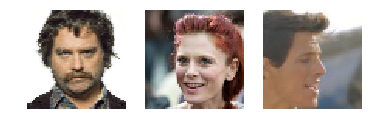

In [5]:
imshow([training[i] for i in range(0,3)])

# Create model and load weights

In [6]:
import tensorflow as tf

epochs = 10

from autoencoder import Autoencoder
vae = Autoencoder(img_shape=(img_size, img_size, 3), batch_size=batch_size)

X = tf.placeholder(tf.float32, [None, img_size, img_size, 3])
encoder = vae.encoder(X)
decoder = vae.decoder(encoder)

latent_loss = vae.latent_loss()
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=vae.logits)
reconstruction_loss = tf.reduce_sum(xentropy)
loss = reconstruction_loss + latent_loss

optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()


In [25]:
import math
batches = int(float(training_set_size) / batch_size) 

with tf.Session() as sess:
    init.run()
    for epoch in range(epochs):
        loss_out = np.zeros(batches)
        for batch in range(batches):
            feed = training[batch*batch_size:(batch+1)*batch_size]
            _, loss_out[batch] = sess.run([training_op, loss], feed_dict={X: feed})
            
        print('loss: %s' % np.mean(loss_out))


loss: 542230.29375
loss: 536178.4375
loss: 530708.746875
loss: 514967.98125
loss: 496478.178125
loss: 482048.49375
loss: 471675.915625
loss: 465711.984375
loss: 460124.665625
loss: 456315.7


In [36]:
with tf.Session() as sess:
    init.run()
    y = sess.run(decoder, feed_dict={X: feed[:batch_size]})
imshow[]

(64, 64, 64, 3)

Compile model

In [7]:
model.model.compile(Adam(lr=.00001), 'binary_crossentropy')
# model.model.compile(Adam(lr=.000001), 'binary_crossentropy')

Load weights

In [10]:
if (True):
    model.model.load_weights(model_weights_path)

# Zach and latest output of Zach

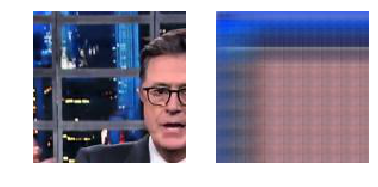

In [66]:
onlyfiles = [f for f in os.listdir(img_save_directory) if os.path.isfile(os.path.join(img_save_directory, f))]
if (len(onlyfiles) > 0):
    latest = max(onlyfiles)
    imshow([training[100], sp.ndimage.imread(os.path.join(img_save_directory, latest))])

# Train

Reset image save filename counter

In [8]:
save_idx = 0

Define some useful Keras callbacks

In [ ]:
# save an image of prediction before training
# predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
# path = os.path.join(img_save_directory, '%04d.jpg' % save_idx)
# sp.misc.imsave(path, predictions[0])
# save_idx += 1

start = save_idx
stop = save_idx + 9999

for i in range(start, stop):
    model.model.fit(x=training, y=training, epochs=1, batch_size=batch_size, verbose=True)
    predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
    path = os.path.join(img_save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, predictions[0])
    model.model.save_weights(model_weights_path)
    save_idx = i

Epoch 1/1
3264/3264 [==============================] - 8s - loss: 3562.5418     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1893.3207     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1386.9627     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1019.6118     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 743.7224     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 543.8678     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 411.6634     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 324.9714     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 263.5239     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 219.1495     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 188.1203     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 162.2845     
Epoch 1/1
3264/3264 [===============

3264/3264 [==============================] - 6s - loss: 1.4526     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.3560     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.3542     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.3725     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 1.3487     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.3440     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.3335     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.3322     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.3397     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.2949     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.2961     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.2797     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 1.3157  

3264/3264 [==============================] - 7s - loss: 0.7260     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.7314     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.7217     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.7194     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.7245     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.7218     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.7171     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.7215     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.7202     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.7216     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.7174     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.7198     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.7222  

3264/3264 [==============================] - 6s - loss: 0.6771     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6692     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6669     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6665     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6674     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6682     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6666     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6659     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6650     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6662     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6656     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6702     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6651  

3264/3264 [==============================] - 6s - loss: 0.6521     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6538     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6551     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6550     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6543     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6573     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6549     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6517     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6552     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6553     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6513     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6531     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6577  

3264/3264 [==============================] - 6s - loss: 0.6460     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6522     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6495     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6478     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6485     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6497     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6479     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6513     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6496     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6532     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6502     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6522     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6503  

3264/3264 [==============================] - 6s - loss: 0.6460     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6456     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6471     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6455     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6469     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6464     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6520     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6494     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6448     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6471     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6455     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6553     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6473  

3264/3264 [==============================] - 6s - loss: 0.6442     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6438     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6438     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6454     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6425     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6437     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6532     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6459     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6474     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6436     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6421     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6442     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6455  

3264/3264 [==============================] - 7s - loss: 0.6425     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6436     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6478     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6459     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6500     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6438     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6494     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6520     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6465     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6495     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6449     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6459     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6473  

3264/3264 [==============================] - 7s - loss: 0.6401     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6404     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6403     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6439     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6443     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6513     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6413     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6438     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6551     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6413     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6398     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6415     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6439  

3264/3264 [==============================] - 6s - loss: 0.6540     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6474     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6477     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6457     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6499     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6421     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6414     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6418     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6437     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6451     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6478     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6493     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6433  

3264/3264 [==============================] - 7s - loss: 0.6438     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6422     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6470     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6556     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6561     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6458     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6435     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6421     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6389     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6381     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6398     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6438     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6462  

3264/3264 [==============================] - 6s - loss: 0.6493     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6427     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6384     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6394     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6397     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6421     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6424     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6501     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6437     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6441     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6469     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6416     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6470  

3264/3264 [==============================] - 6s - loss: 0.6431     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6394     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6388     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6397     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6382     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6375     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6405     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6394     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6420     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6399     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6402     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6417     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6430  

3264/3264 [==============================] - 6s - loss: 0.6386     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6375     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6428     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6424     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6415     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6599     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6424     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6410     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6393     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6510     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6510     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6469     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6423  

3264/3264 [==============================] - 6s - loss: 0.6454     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6449     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6526     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6533     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6433     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6394     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6432     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6407     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6407     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6392     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6448     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6563     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6479  

3264/3264 [==============================] - 6s - loss: 0.6426     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6600     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6460     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6430     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6567     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6513     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6426     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6438     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6389     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6380     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6395     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6425     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6446  

3264/3264 [==============================] - 6s - loss: 0.6376     
Epoch 1/1
3264/3264 [==============================] - 7s - loss: 0.6374     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6377     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6402     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6493     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6415     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6473     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6462     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6436     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6453     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6487     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6718     
Epoch 1/1
3264/3264 [==============================] - 6s - loss: 0.6430  

In [17]:
from keras import backend as K
K.eval(model.model.optimizer.lr)

9.9999997e-06

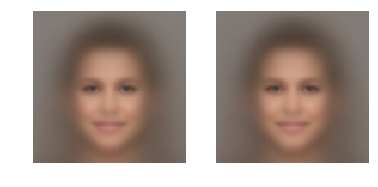

In [57]:
predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
imshow([predictions[0], predictions[7]])